   #### Mawrer Amed Ramirez Martinez ms723737@iteso.mx
   #### Avance de TOG IDI 4

#  Ajuste de Dataset (Preparacion para Clasificacion)
# El objetivo de este Notebook es SOLO agregar YHat


In [1]:
import numpy as np
np.random.seed(1)
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
import pandas as pd
import os, glob

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
SOURCE_TYPE = "EURUSD_FULL"
FRECUENCIA = "1H"
NUM_FEATURES = 0

In [4]:
pwd = os.getcwd()
datasource_path = os.path.join(pwd, r'../../../Datasets/Junio2020/procesados-regression/')
filenames = glob.glob(datasource_path + "/*.csv")
filenames.sort()
for file in filenames:
    print(os.path.basename(file))

R-EURUSD_FULL_1H_44F.csv
R-EURUSD_FULL_1H_49F.csv


## Read CSV

### Read Dataset From Regression

In [5]:
if FRECUENCIA =="1D":
    dateparse = lambda x: pd.datetime.strptime(x, '%Y-%m-%d')
else:
    dateparse = lambda x: pd.datetime.strptime(x, '%Y-%m-%d %H:%M:%S')
DATASET_FULL = pd.read_csv(filenames[0], header=0, parse_dates=['Gmt time'], date_parser=dateparse)
print(DATASET_FULL)
print(DATASET_FULL.shape)

                  Gmt time     Open     High      Low    Close      Volume  \
0      2004-01-01 00:00:00  1.25950  1.25960  1.25826  1.25910   6654.2002   
1      2004-01-01 01:00:00  1.25958  1.25960  1.25947  1.25951    660.6000   
2      2004-01-01 02:00:00  1.25955  1.25962  1.25944  1.25951   2091.0000   
3      2004-01-01 03:00:00  1.25950  1.25965  1.25834  1.25869  10003.0996   
4      2004-01-01 04:00:00  1.25908  1.25960  1.25843  1.25950   7603.3999   
...                    ...      ...      ...      ...      ...         ...   
102509 2020-05-29 19:00:00  1.10998  1.11070  1.10862  1.10998  12120.8398   
102510 2020-05-29 20:00:00  1.10997  1.11094  1.10982  1.11071   4646.7427   
102511 2020-05-31 21:00:00  1.11213  1.11217  1.11136  1.11141    417.4906   
102512 2020-05-31 22:00:00  1.11138  1.11148  1.11028  1.11123   4549.1167   
102513 2020-05-31 23:00:00  1.11123  1.11199  1.11119  1.11158   5159.8101   

        Open_Bid  High_Bid  Low_Bid  Close_Bid  ...        R3  

In [22]:
#DEFINE VALUES
NEG_UNO = -0.00028
UNO = 0.00028

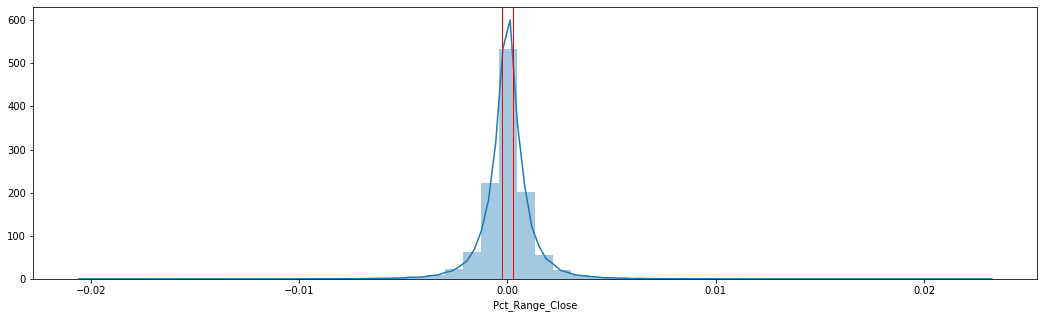

In [23]:
plt.figure(figsize=(18,5))
sns.distplot(DATASET_FULL['Pct_Range_Close']);
plt.axvline(UNO, 0, 1, linewidth=1, color='r')
plt.axvline(NEG_UNO, 0, 1, linewidth=1, color='r')

### Add Col 'YHat' 

In [24]:
DATASET_FULL['Class'] = 0

DATASET_FULL.loc[DATASET_FULL['Pct_Range_Close'] <= NEG_UNO, 'Class'] = -1
DATASET_FULL.loc[DATASET_FULL['Pct_Range_Close'] >= UNO, 'Class'] = 1

DATASET_FULL['Class'] = DATASET_FULL['Class'].shift(-1)
DATASET_FULL['Class'].fillna(0, inplace=True)
print(DATASET_FULL['Class'].head(5))

0    1.0
1    0.0
2   -1.0
3    1.0
4    0.0
Name: Class, dtype: float64


In [25]:
print(DATASET_FULL['Class'].value_counts())

 1.0    34610
-1.0    34466
 0.0    33438
Name: Class, dtype: int64


In [26]:
DATASET_FULL['Class'].describe()

count    102514.000000
mean          0.001405
std           0.820868
min          -1.000000
25%          -1.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: Class, dtype: float64

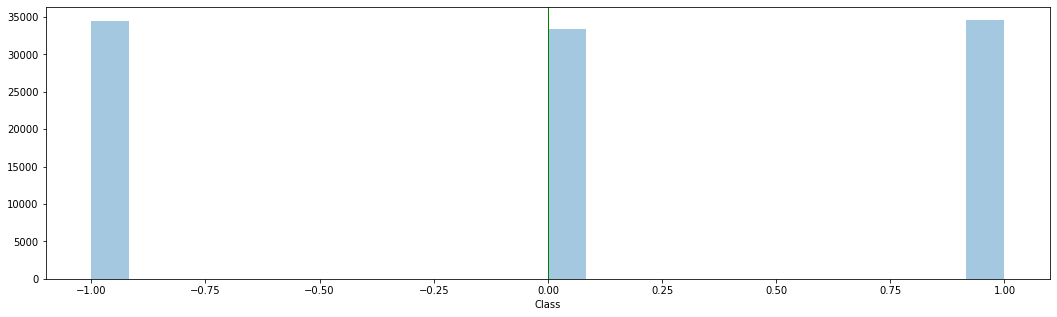

In [27]:
plt.figure(figsize=(18,5))
sns.distplot(DATASET_FULL['Class'],kde=False);
plt.axvline(UNO, 0, 1, linewidth=1, color='r')
plt.axvline(NEG_UNO, 0, 1, linewidth=1, color='r')

In [28]:
DATASET_FULL[['Close','Pct_Range_Close','Class']].head(10)

,Close,Pct_Range_Close,Class
0,1.25910,0.000000,1.0
1,1.25951,0.000326,0.0
2,1.25951,0.000000,-1.0
3,1.25869,-0.000651,1.0
4,1.25950,0.000644,0.0
5,1.25955,0.000040,0.0
6,1.25948,-0.000056,-1.0
7,1.25910,-0.000302,0.0
8,1.25907,-0.000024,0.0
9,1.25917,0.000079,0.0


### Save CSV File 'DF_EURUSD_ASK_1H_PROC.csv'

In [30]:
#Get the Final number of Features
NUM_FEATURES = str(DATASET_FULL.shape[1])
filename = '3C-' + SOURCE_TYPE + '_' + FRECUENCIA + '_' + NUM_FEATURES + 'F.csv'
print(filename)

3C-EURUSD_FULL_1H_45F.csv


In [31]:
pwd = os.getcwd()
filename_path = os.path.join(pwd, r'../../../Datasets/Junio2020/procesados_classification/' + filename)
DATASET_FULL.to_csv(filename_path, header=True, index=False)